In [1]:
import numpy as np
from numpy import genfromtxt
# dataset
data = genfromtxt ('advertising (1).csv', delimiter =',', skip_header =1)
N = data . shape [0]
X = data [: ,:3]
y = data [: ,3:]

 # Normalize input data by using mean normalizaton
def mean_normalization ( X) :
  N = len( X )
  maxi = np .max ( X )
  mini = np .min ( X )
  avg = np . mean ( X )
  X = (X - avg ) / ( maxi - mini )
  X_b = np . c_ [ np . ones (( N , 1) ) , X ]
  return X_b , maxi , mini , avg

X_b , maxi , mini , avg = mean_normalization ( X )

In [85]:
def stochastic_gradient_descent ( X_b , y , n_epochs =50 , learning_rate =0.00001) :

  # thetas = np. random . randn (4 , 1) # uncomment this line for real application
  thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
  [0.29763545]])

  thetas_path = [ thetas ]
  losses = []

  for epoch in range ( n_epochs ) :

      for i in range ( N ) :
          # select random number in N
          #random_index = np. random . randint (N) #In real application , you should use this code
          random_index = i # This code is used for this assignment only

          xi = X_b [ random_index : random_index +1]
          yi = y [ random_index : random_index +1]

          # Compute output ******* Your code here ********
          output = np .dot ( xi , thetas )
          
          # Compute loss li ******* Your code here ********
          loss = (output - yi) ** 2
          losses.append(loss[0][0])  # Append scalar value of the loss
          # Compute gradient for loss ******* Your code here ********
          dli=2*(output-yi)
          # Compute gradient ******* Your code here ********
          dthetas=np.dot(xi.T,dli)
          # update theta ******* Your code here ********
          thetas-=learning_rate*dthetas
          thetas_path.append(thetas)
          
      # logging
     
          
  return thetas_path , losses

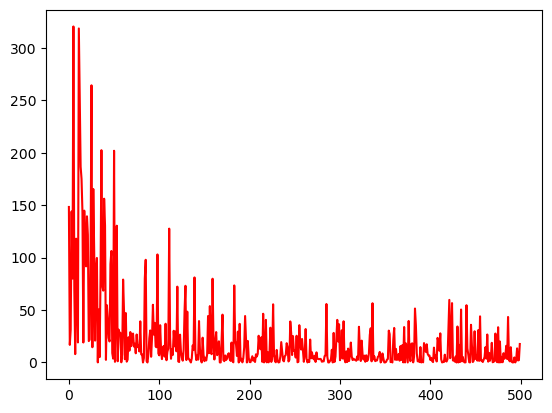

In [121]:
import matplotlib.pyplot as plt
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =50 ,learning_rate =0.01 )
x_axis = list ( range (500) )
plt.plot ( x_axis , losses [:500] , color ="r")
plt.show ()

In [123]:
sgd_theta , losses = stochastic_gradient_descent ( X_b , y , n_epochs =1 , learning_rate
=0.01 )
print ( np .sum( losses ) )

8266.652262712309


In [223]:
def mini_batch_gradient_descent ( X_b , y , n_epochs =50 , minibatch_size =20
 , learning_rate =0.01) :

    # thetas = np. random . randn (4 , 1)
    thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
    [0.29763545]])
    
    thetas_path = [ thetas]
    losses = []
    
    for epoch in range ( n_epochs ) :
        # shuffled_indices = np. random . permutation (N) # uncomment this code for real application
        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
        132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
        185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
        165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
        169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
        77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
        195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
        92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
        174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
        129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
        168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
        133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
        154])
        X_b_shuffled = X_b [ shuffled_indices ]
        y_shuffled = y [ shuffled_indices ]
        
        for i in range (0 , N , minibatch_size ):
            xi = X_b_shuffled [ i : i + minibatch_size ]
            yi = y_shuffled [ i: i + minibatch_size ]
            
            # compute output ******* Your code here ********
            output=np.dot(xi,thetas)
            
            # compute loss ******* Your code here ********
            loss=(output-yi)**2
            
            # compute derivative of loss ******* Your code here ********
            dl=2*(output-yi)
            
            # compute derivative of parameters ******* Your code here ********
            gradients=np.dot(xi.T,dl)/minibatch_size
            
            # update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path . append ( thetas)
            
            loss_mean = np .mean( loss )
            losses . append ( loss_mean )
    
    return thetas_path , losses

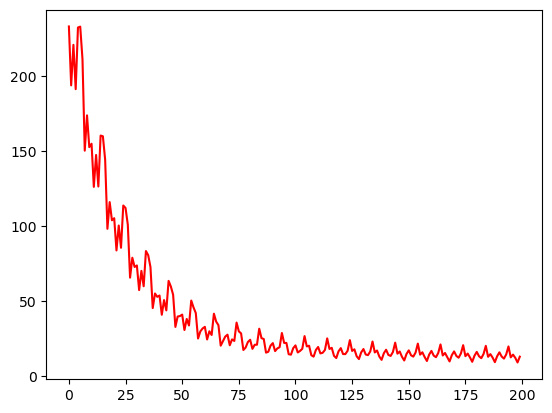

In [225]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)

x_axis = list ( range (200) )
plt . plot ( x_axis , losses [:200] , color ="r")
plt . show ()

In [227]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,
minibatch_size = 20 , learning_rate =0.01)
print ( round ( sum( losses ) ,2) )

11402.48


In [59]:
def batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate =0.01) :

    # thetas = np. random . randn (4 , 1) # uncomment this line for real application
    thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
    [0.29763545]])
    
    thetas_path = [ thetas ]
    losses = []
    
    for i in range ( n_epochs ) :
        # compute output ******* Your code here ********
        output=np.dot(X_b ,thetas)
        # Compute loss ******* Your code here ********
        loss=(output-y)**2
        
        # Compute losss ’s derivative ******* Your code here ********
        dl=2*(output-y)
        # computer parameters ’ derivative ******* Your code here ********
        gradients=np.dot(X_b.T,dl)/N
        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path . append ( thetas )
        
        mean_loss = np .sum( loss ) / N
        losses . append ( mean_loss )
    
    return thetas_path , losses

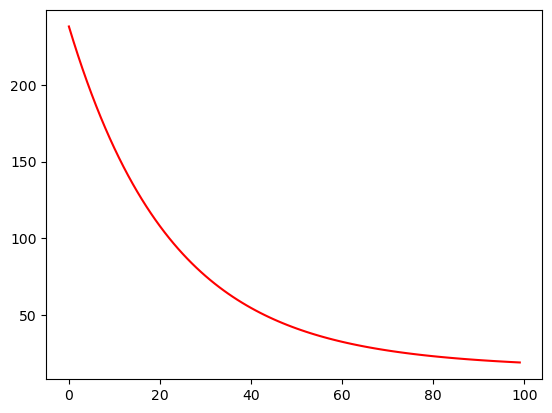

In [61]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate
=0.01)
x_axis = list ( range (100) )
plt . plot ( x_axis , losses [:100] , color ="r")
plt . show ()

In [63]:
bgd_thetas , losses = batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate
=0.01)
print ( round ( sum( losses ) ,2) )

6716.46
